### Estimation and Confidence Intervals

This notebook calculates 99% confidence intervals for the mean durability of print-heads using:
1. The sample standard deviation (t-distribution)
2. The known population standard deviation (z-distribution)


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

data = [1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.2, 1.33, 1.18, 1.22, 1.29]
n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof=1)


In [2]:
# t-distribution
t_critical = stats.t.ppf(1 - 0.005, df=n-1)
margin_of_error_t = t_critical * (std_dev / np.sqrt(n))
ci_t = (mean - margin_of_error_t, mean + margin_of_error_t)


In [3]:
# z-distribution
sigma = 0.2
z_critical = stats.norm.ppf(1 - 0.005)
margin_of_error_z = z_critical * (sigma / np.sqrt(n))
ci_z = (mean - margin_of_error_z, mean + margin_of_error_z)

print("Sample Mean:", round(mean, 4))
print("Sample Standard Deviation:", round(std_dev, 4))
print("99% CI using t-distribution:", tuple(round(v, 4) for v in ci_t))
print("99% CI using z-distribution:", tuple(round(v, 4) for v in ci_z))


Sample Mean: 1.2387
Sample Standard Deviation: 0.1932
99% CI using t-distribution: (np.float64(1.0902), np.float64(1.3871))
99% CI using z-distribution: (np.float64(1.1057), np.float64(1.3717))


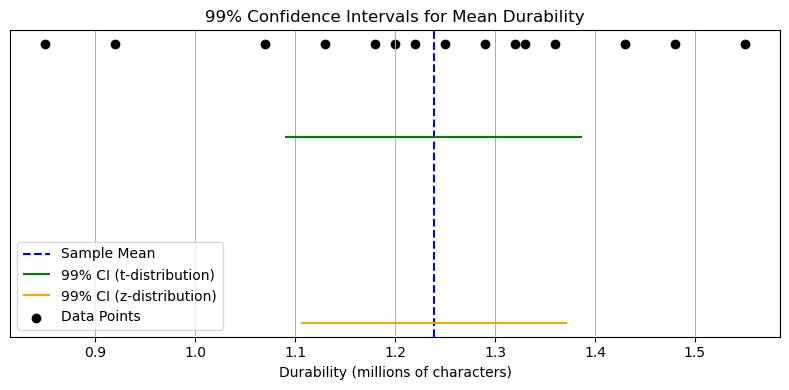

In [4]:
# Plotting
plt.figure(figsize=(8, 4))
plt.axvline(mean, color='blue', linestyle='--', label='Sample Mean')
plt.hlines(y=1, xmin=ci_t[0], xmax=ci_t[1], colors='green', label='99% CI (t-distribution)')
plt.hlines(y=0.9, xmin=ci_z[0], xmax=ci_z[1], colors='orange', label='99% CI (z-distribution)')
plt.scatter(data, np.ones_like(data) * 1.05, color='black', label='Data Points')
plt.yticks([])
plt.xlabel('Durability (millions of characters)')
plt.title('99% Confidence Intervals for Mean Durability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
